In [1]:
%load_ext autoreload
%autoreload 2
from src.pipelines import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
pipe = Pipeline(
    train_data="data/train.csv",
    test_data="data/test.csv",
    params="params.yaml",
)

In [34]:
actual_df = pipe.train_data.copy()
actual_df["CLASSI_FN"] = pipe.target
actual_df

,CS_SEXO,NU_IDADE_N,CS_GESTANT,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,...,OUT_MORBI,OBESIDADE,NEUROLOGIC,PNEUMOPATI,PUERPERA,TP_ANTIVIR,MAE_VAC,TOMO_OUT,OBES_IMC,CLASSI_FN
0,M,73,6,2.0,2.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4
1,M,27,6,NaN,NaN,1.0,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,F,2,6,2.0,2.0,1.0,1.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,F,71,5,2.0,2.0,2.0,2.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,4
4,F,91,5,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300975,M,1,6,1.0,2.0,2.0,2.0,2.0,1.0,1.0,...,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,3
1300976,F,99,5,2.0,9.0,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1300977,M,70,6,2.0,2.0,NaN,1.0,NaN,1.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3
1300978,M,39,6,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,1.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3


## CS_SEXO em relação ao target

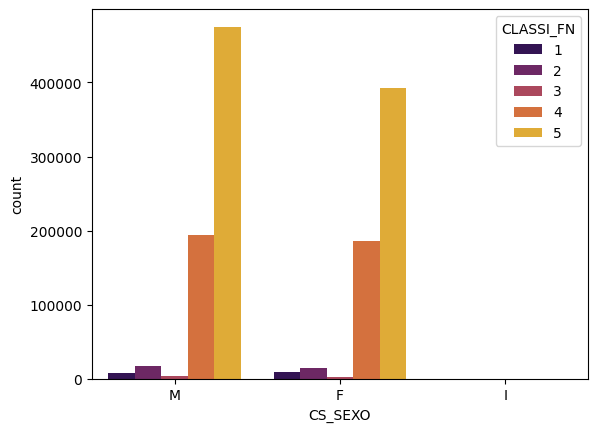

In [8]:
_ = sns.countplot(x="CS_SEXO", data=actual_df, hue="CLASSI_FN", palette="inferno")
plt.show()

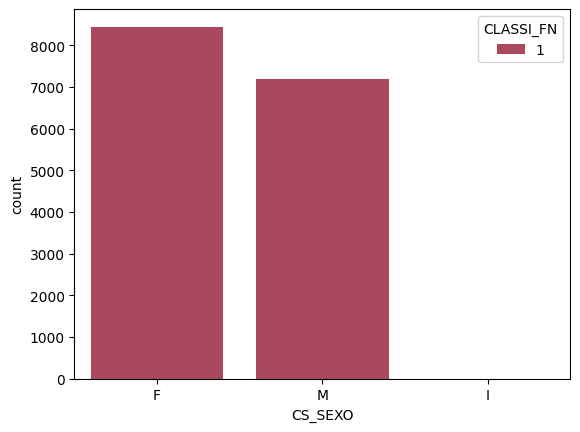

In [15]:
_ = sns.countplot(x="CS_SEXO", data=actual_df[actual_df["CLASSI_FN"] == 1], hue="CLASSI_FN", palette="inferno")
plt.show()

Único lugar onde temos uma inversão (mesmo que de baixa proporção) nas quantidade de Mulheres e Homens é na classe 2, 1 e 4, onde temos SRAG por influenza (1) e por vírus respiratório (2) e por não especificado (4).

## Como estão os valores de NU_IDADE_N

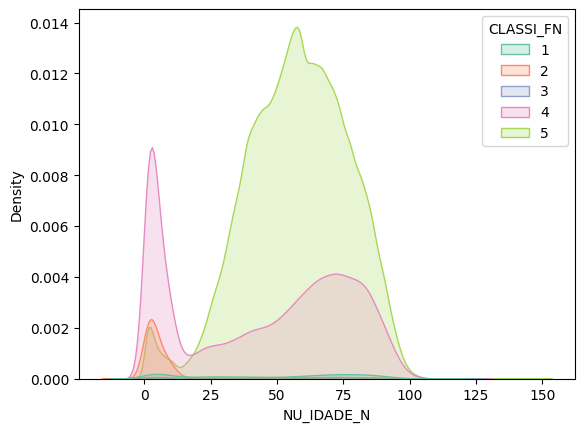

In [18]:
_ = sns.kdeplot(data=actual_df, x="NU_IDADE_N", hue="CLASSI_FN", fill=True, palette="Set2")
plt.show()

Aqui nós vemos que a idade é um preditor bem interessante, a medida que visualizamos a distribuição em relação ao target, vimos que existe uma distribuição bimodal em ambos os casos, mas que também é muito característica de cada classe do problema.

In [19]:
actual_df["NU_IDADE_N"].describe()

count    1.300980e+06
mean     5.245101e+01
std      2.522482e+01
min     -9.000000e+00
25%      3.800000e+01
50%      5.600000e+01
75%      7.200000e+01
max      1.500000e+02
Name: NU_IDADE_N, dtype: float64

In [20]:
actual_df[actual_df["NU_IDADE_N"] < 0]

,CS_SEXO,NU_IDADE_N,CS_GESTANT,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,...,ANTIVIRAL,HOSPITAL,UTI,SUPORT_VEN,FADIGA,VACINA_COV,DOSE_1_COV,DOSE_2_COV,FNT_IN_COV,CLASSI_FN
4927,F,-1,6,2.0,2.0,2.0,1.0,2.0,1.0,1.0,...,2.0,1.0,2.0,3.0,2.0,2.0,0,0,2.0,4
98817,M,-2,6,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,3.0,2.0,2.0,0,0,1.0,4
146464,M,-1,6,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,2.0,1.0,2.0,3.0,1.0,NaN,0,0,NaN,4
198921,M,-1,6,9.0,9.0,1.0,NaN,NaN,1.0,NaN,...,9.0,1.0,NaN,NaN,NaN,2.0,0,0,2.0,4
1181846,M,-9,6,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,3.0,2.0,2.0,0,0,2.0,5
1271305,M,-9,6,2.0,2.0,2.0,1.0,2.0,1.0,1.0,...,2.0,1.0,2.0,3.0,2.0,2.0,0,0,1.0,2


In [22]:
actual_df[actual_df["NU_IDADE_N"] > 100].value_counts("CLASSI_FN")

CLASSI_FN
5    936
4    594
1     28
3     11
2      8
dtype: int64

## CS_GESTANTE em relação ao target

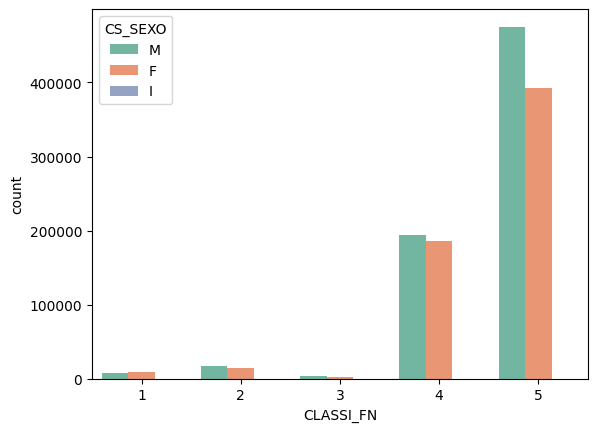

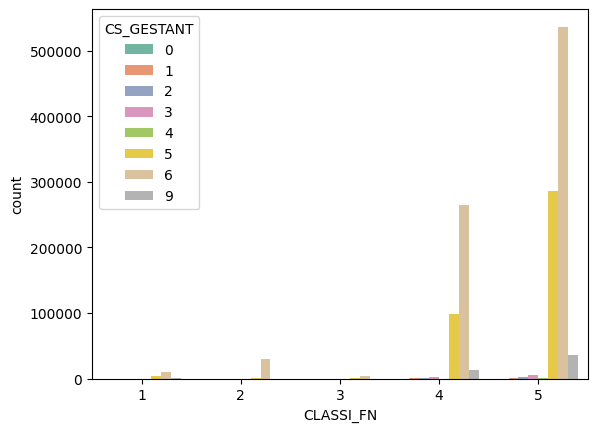

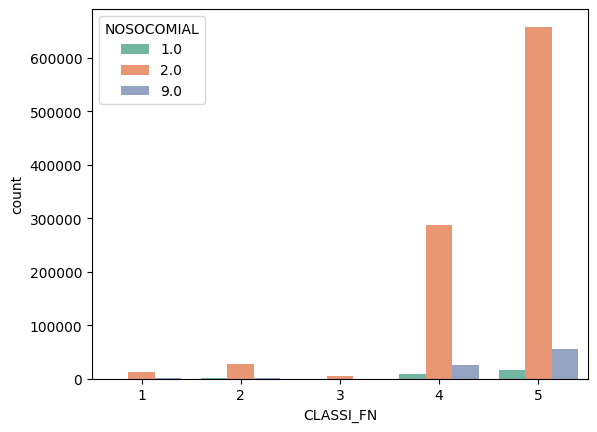

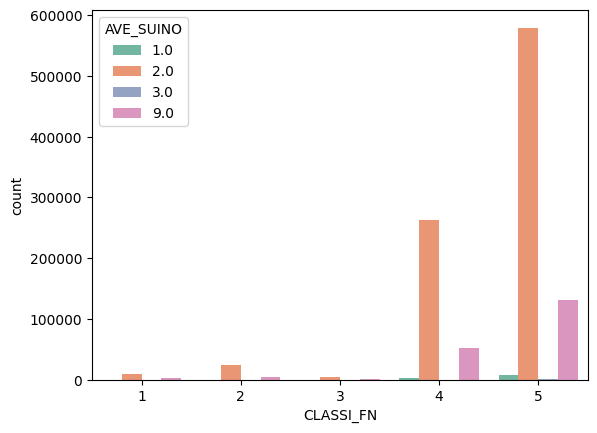

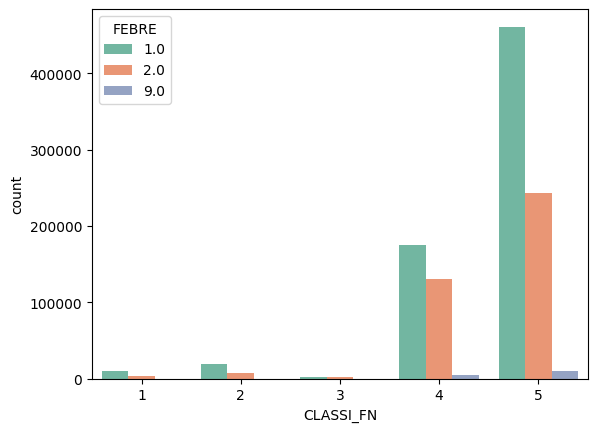

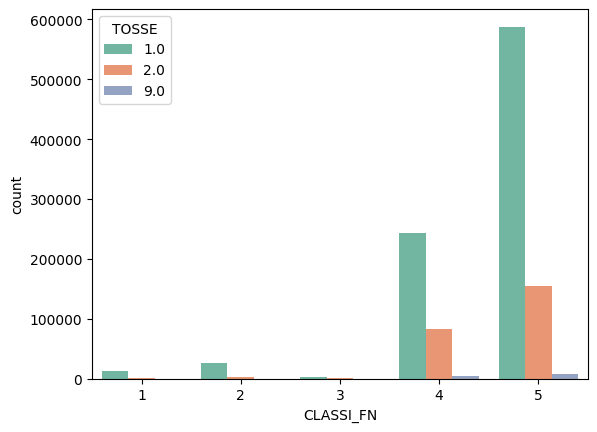

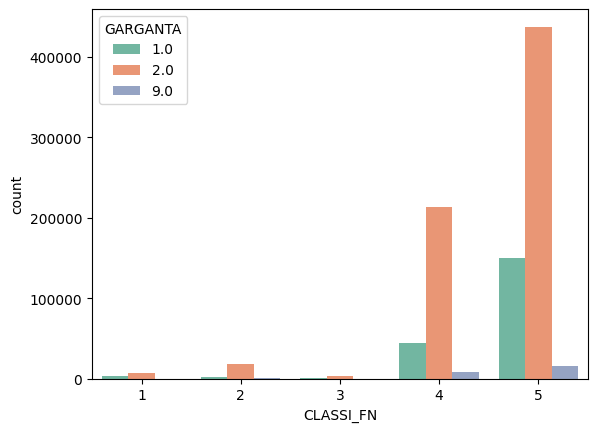

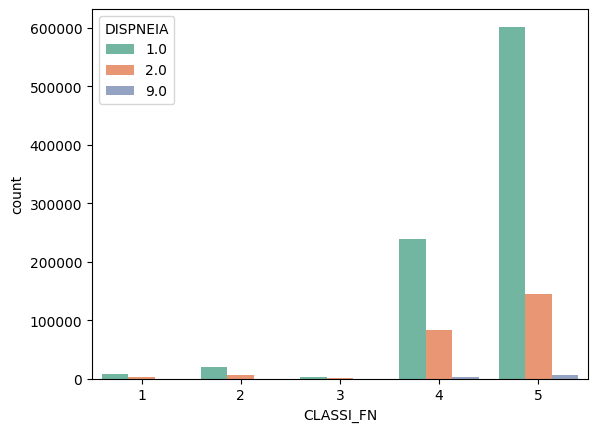

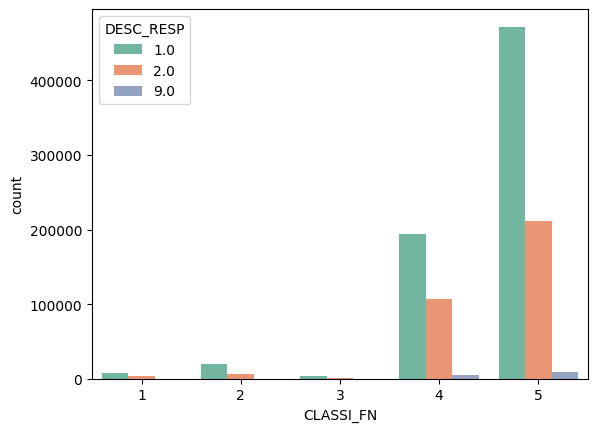

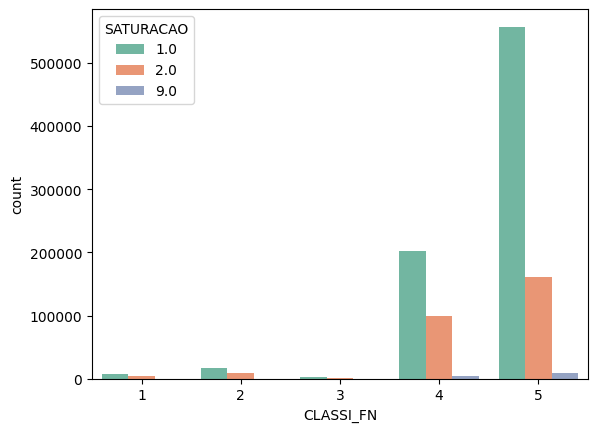

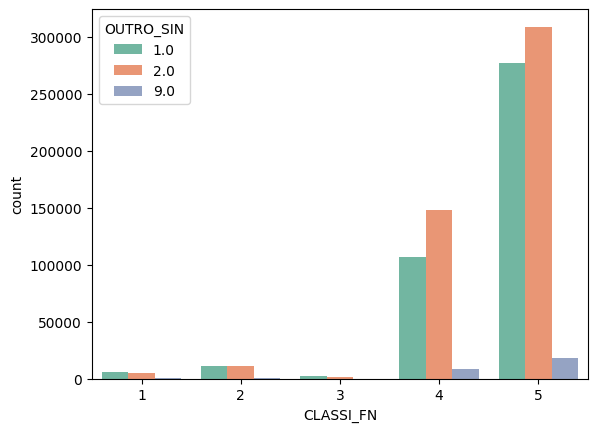

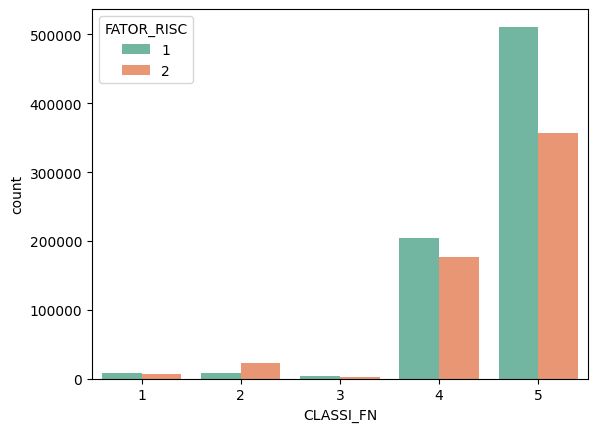

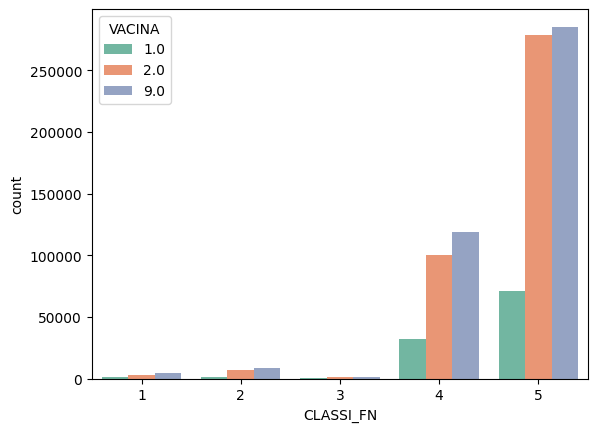

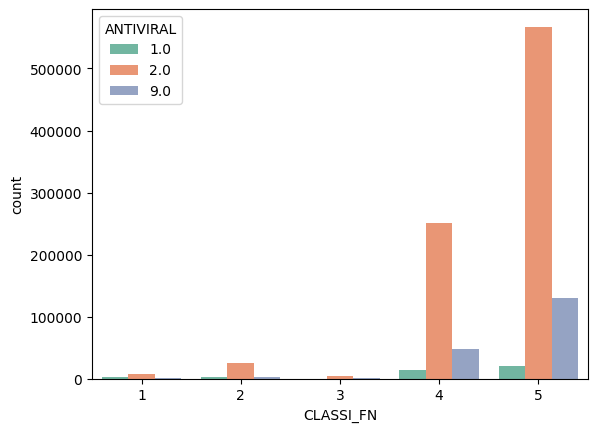

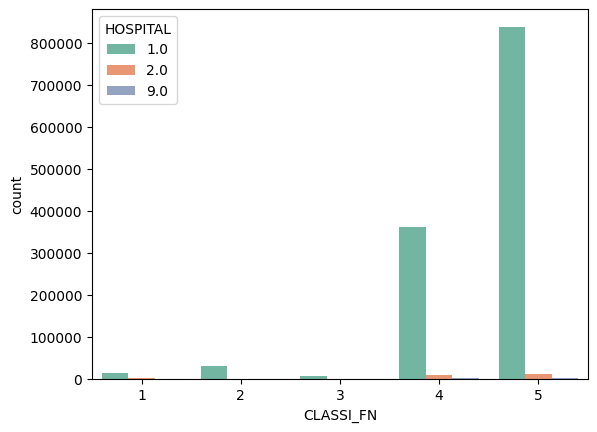

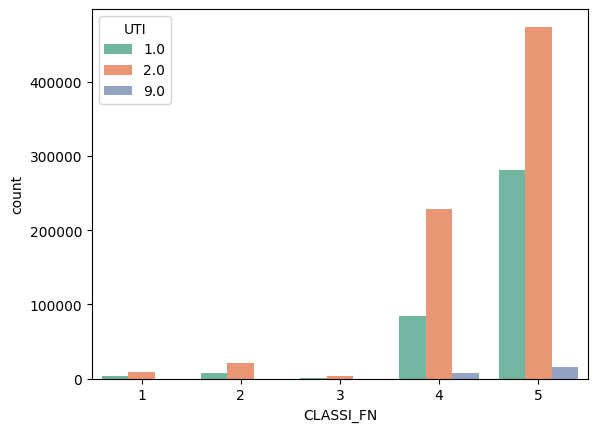

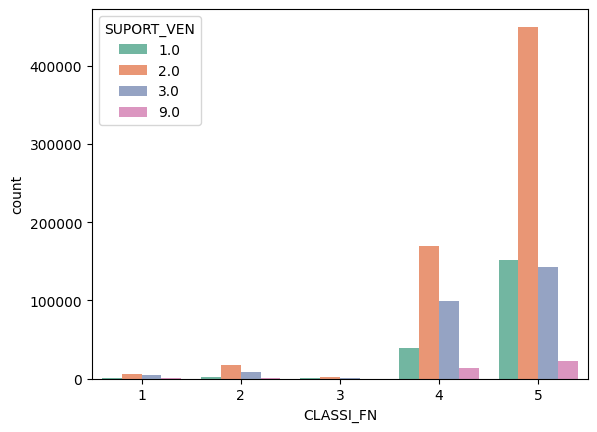

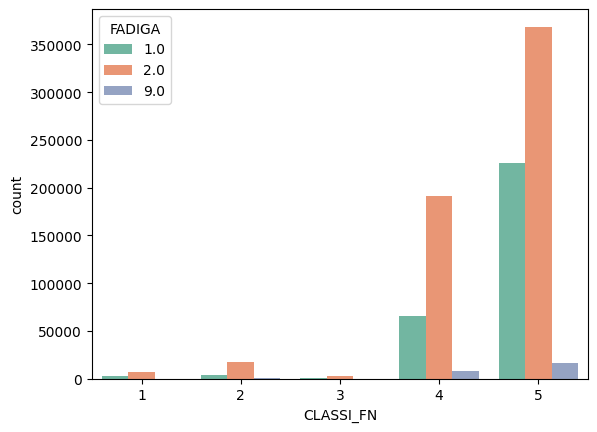

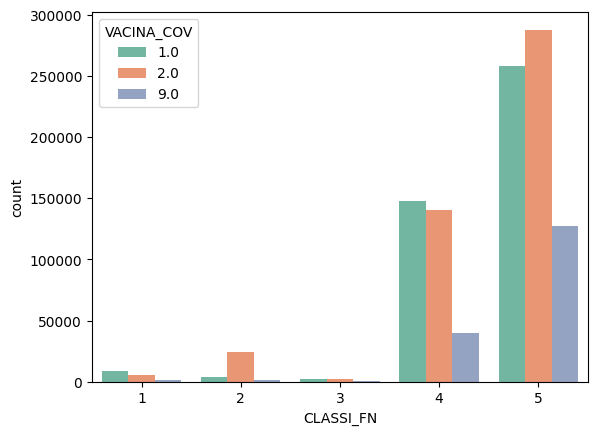

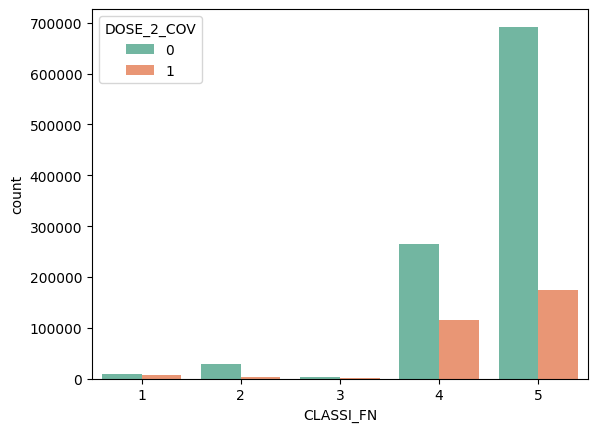

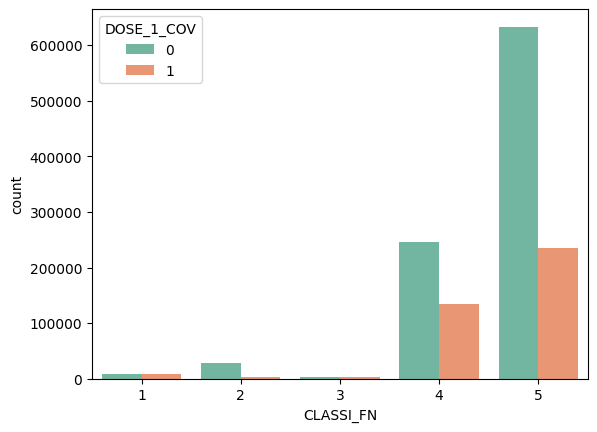

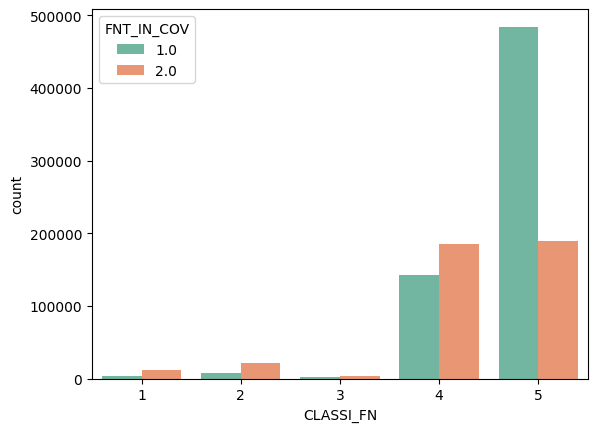

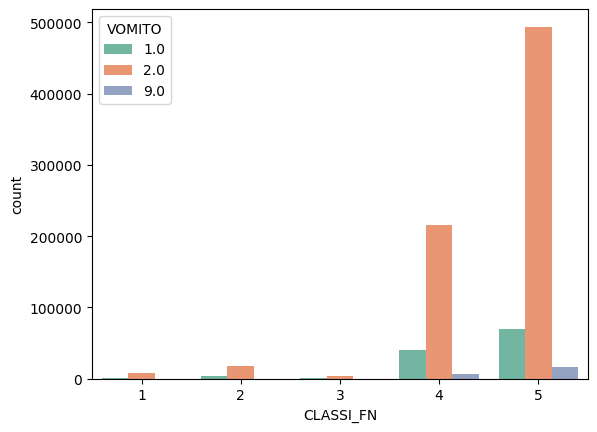

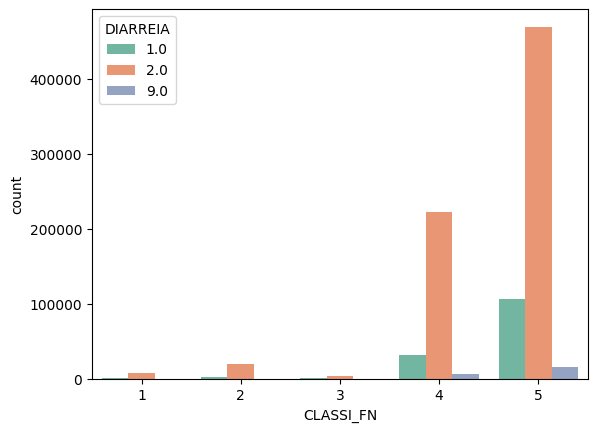

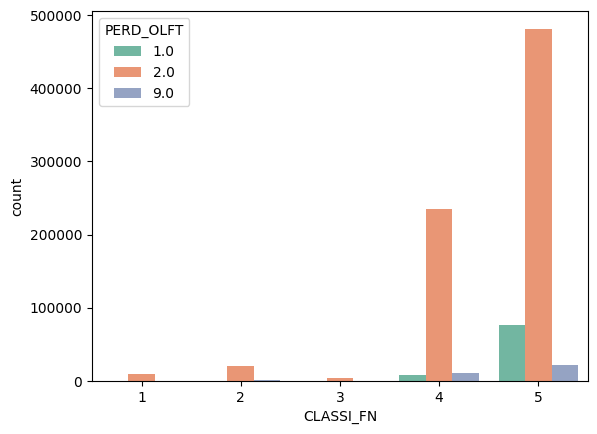

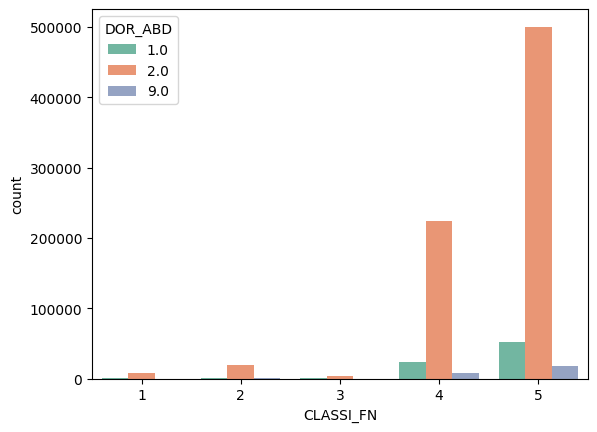

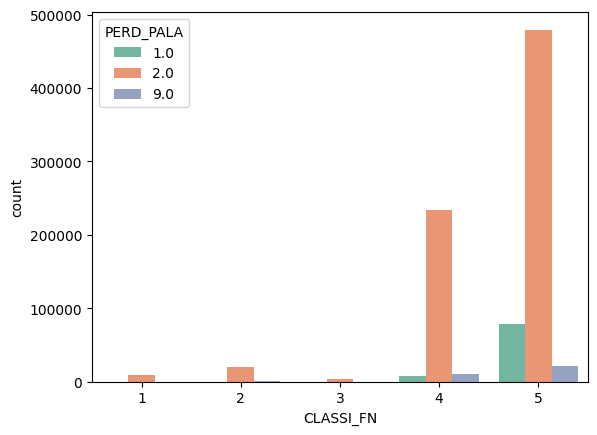

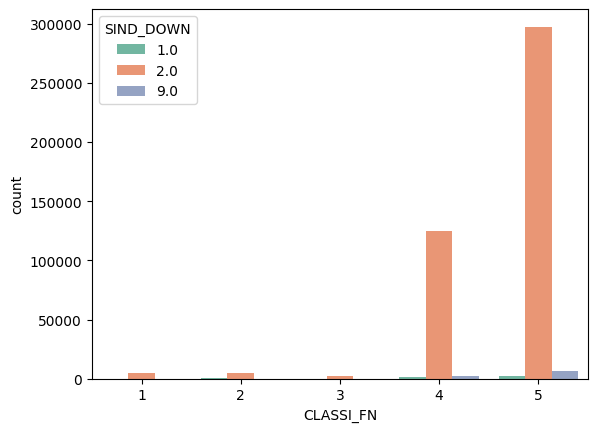

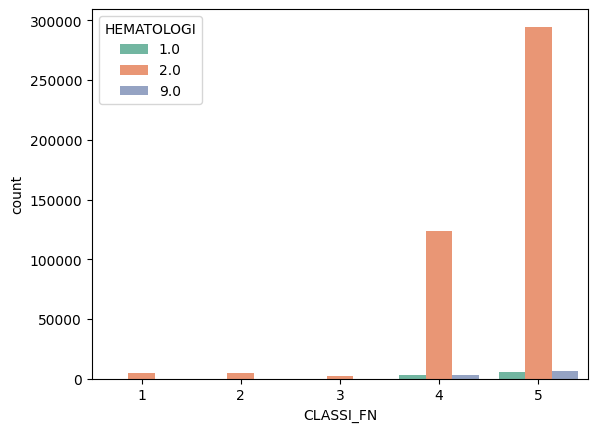

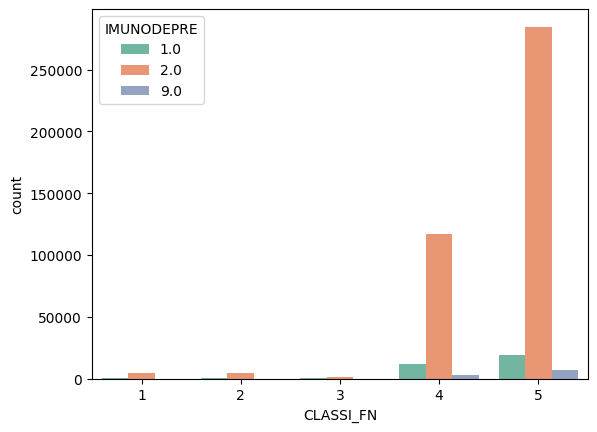

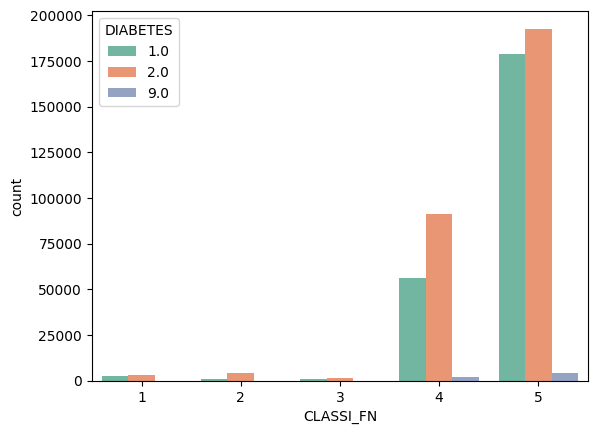

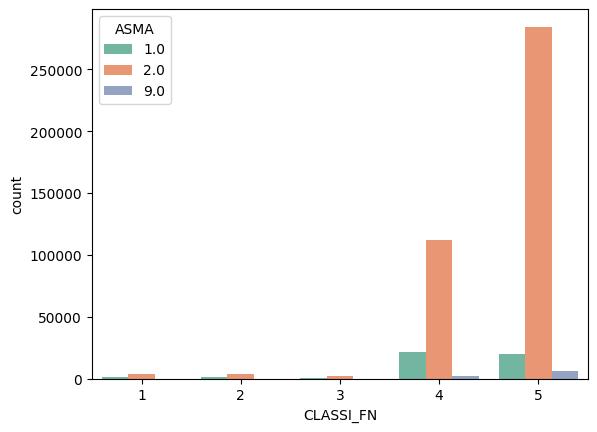

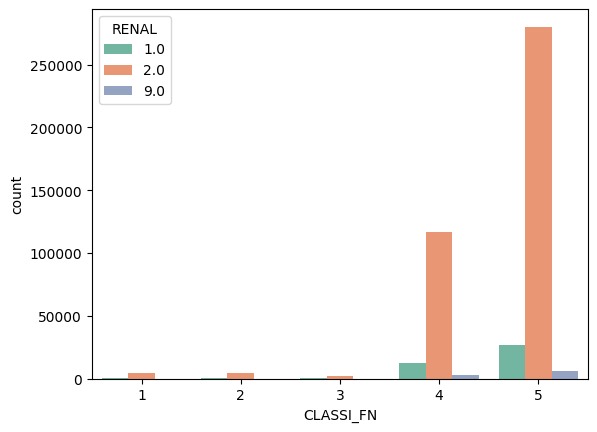

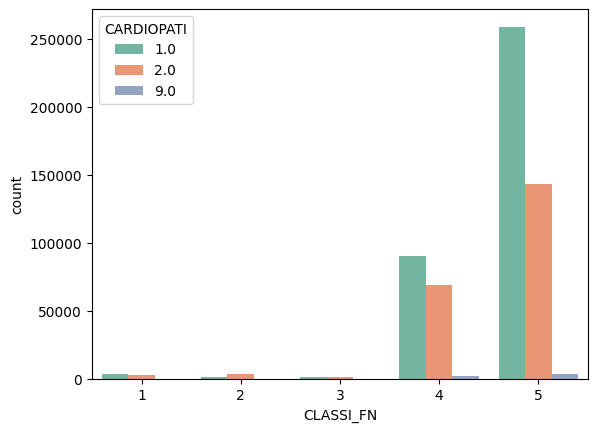

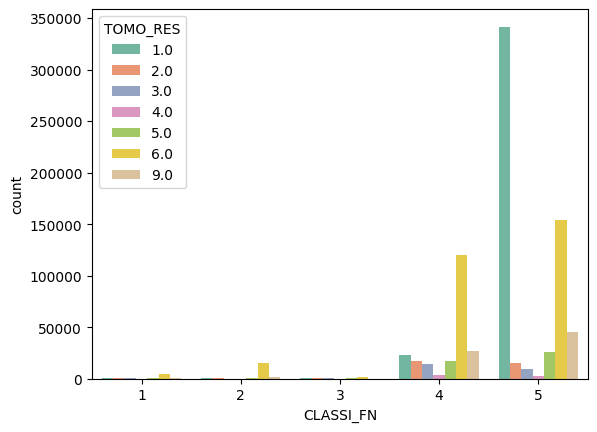

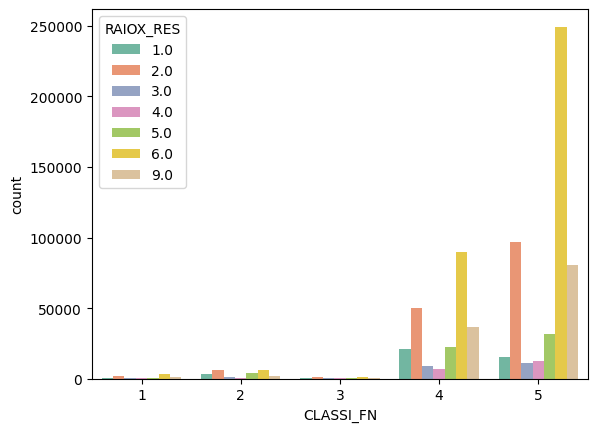

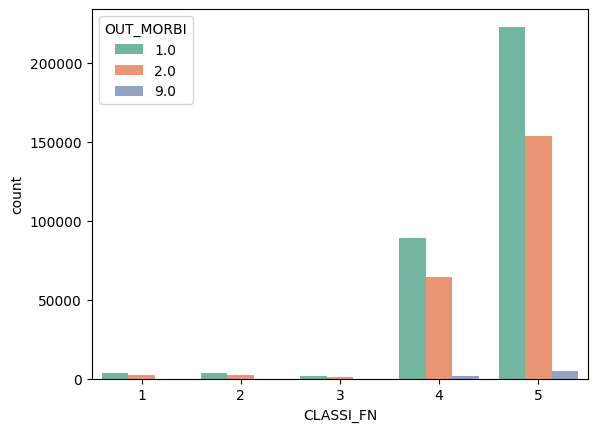

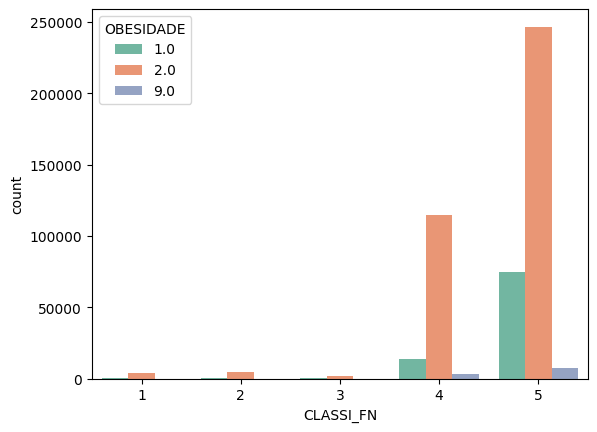

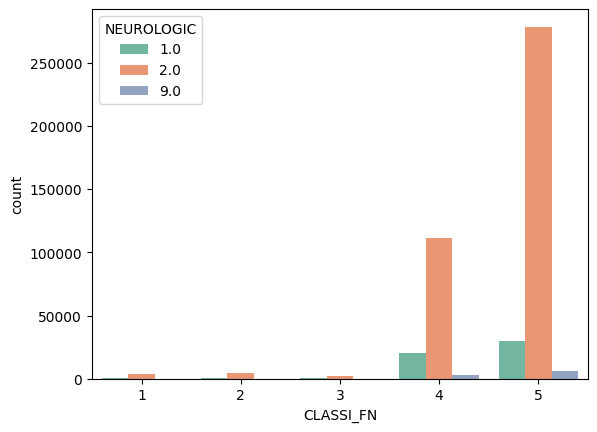

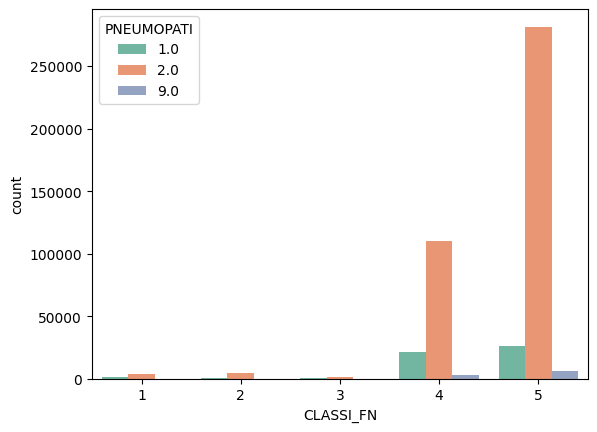

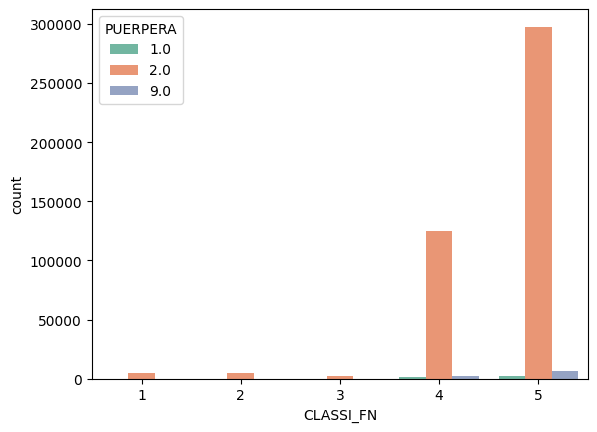

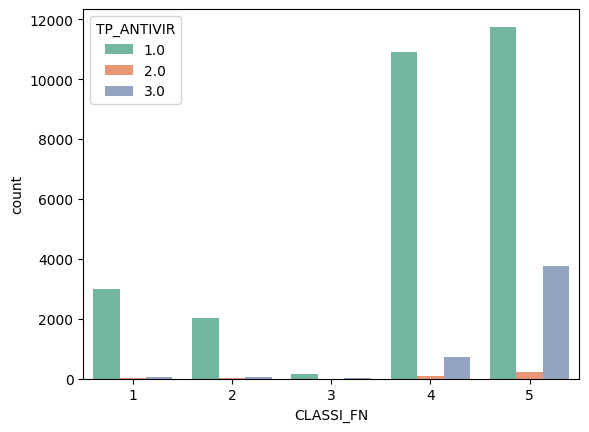

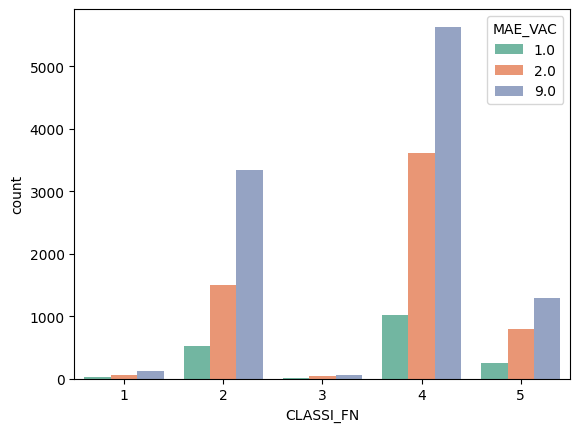

/home/luba/.local/share/virtualenvs/ensure-healthy-lives-P5sLq0px/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 587x217310 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

KeyboardInterrupt: 

In [35]:
for column in actual_df.columns:
    if column != "NU_IDADE_N":
        _ = sns.countplot(
            data=actual_df, x="CLASSI_FN", hue=column, fill=True, palette="Set2"
        )
        plt.show()